In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/content/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
gender = pd.get_dummies(data['Gender'],drop_first=True)
data['Gender'] = gender

In [5]:
x = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=6)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
log = LogisticRegression()
log.fit(xtrain,ytrain)

LogisticRegression()

In [11]:
ypred = log.predict_proba(xtest)[:,1]
ypred

array([0.17951237, 0.03063415, 0.0283412 , 0.08448463, 0.00466519,
       0.35053411, 0.00804248, 0.34027878, 0.48728052, 0.17995356,
       0.147309  , 0.89777925, 0.46861906, 0.08696465, 0.03547792,
       0.38355329, 0.33766941, 0.26539899, 0.75062881, 0.35250653,
       0.8561314 , 0.09867214, 0.02973963, 0.04202028, 0.51762335,
       0.31840845, 0.46101766, 0.94778468, 0.88588074, 0.02973963,
       0.02919493, 0.01642907, 0.60809846, 0.00220381, 0.51892083,
       0.75916678, 0.56078934, 0.89503021, 0.00788449, 0.20792853,
       0.33251016, 0.33485766, 0.0090232 , 0.05788442, 0.07653994,
       0.01755443, 0.97608291, 0.34215664, 0.85197019, 0.19471512,
       0.91875446, 0.94449517, 0.19904751, 0.39406647, 0.005477  ,
       0.01824066, 0.68945476, 0.40798712, 0.36307189, 0.72646812,
       0.97797616, 0.04934446, 0.94461922, 0.31612146, 0.45109562,
       0.39282626, 0.00733525, 0.10702355, 0.88076918, 0.04779422,
       0.86254412, 0.63505391, 0.51467399, 0.32028925, 0.98488

In [12]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(ytest,ypred)
df = pd.DataFrame()
df['FPR'] = fpr
df["TPR"] = tpr
df['Thresholds'] = thresholds
df

,FPR,TPR,Thresholds
0,0.000000,0.000000,1.990964
1,0.000000,0.035714,0.990964
2,0.000000,0.500000,0.856131
3,0.019231,0.500000,0.851970
4,0.019231,0.642857,0.689455
5,0.038462,0.642857,0.635054
6,0.038462,0.785714,0.517623
7,0.211538,0.785714,0.383553
8,0.211538,0.892857,0.350534
9,0.288462,0.892857,0.337669


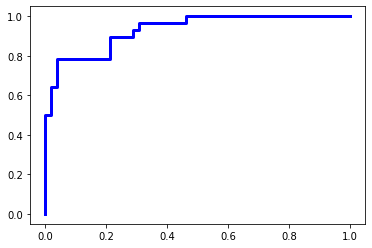

In [13]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='blue',label='ROC Curve',lw=3)
plt.plot()
plt.show()

In [14]:
th = 0.4
ypred_1 = np.where(ypred>th,1,0)
ypred_1

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0])

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred_1)

0.825